# Analysis and visualisation of SEM Using Python SEMOPY
Structural Equation Modeling (SEM)

### See acricle
semopy: A Python Package for Structural Equation Modeling
Anna A. IgolkinaORCID Icon &Georgy MeshcheryakovORCID Icon
Pages 952-963 | Published online: 18 Feb 2020
Download citation https://doi.org/10.1080/10705511.2019.1704289 CrossMark LogoCrossMark

## Imports

In [9]:
# import pandas module 
import pandas as pd 
import semopy as sem
import numpy as np
from IPython.display import Image

## Functions

## Prepare Data

In [10]:
# import header file
df = pd.read_excel('http://www.d5mit.co.za/artifacts/output.xlsx')

df = df[df['ai_transparency_to_trust'].notna()]

df.drop('email', axis='columns', inplace=True)
df.drop('first_name', axis='columns', inplace=True)
df.drop('last_name', axis='columns', inplace=True)
df.drop('custom_data', axis='columns', inplace=True)

df = df[df['ai_fat_to_trust'].notna()]

In [11]:
df.describe()

,Unnamed: 0,resp_id,colle_id,d_tools,d_capabilities,d_culture,d_acts_on_data,d_fin_benefits,d_non_fin_benefits,m_maturity_rating,...,sy_fairness_to_trust,sy_trust_to_adoption,sy_lack_trust_low_adoption,ai_transparency_to_trust,ai_accountability_to_trust,ai_fairness_to_trust,ai_trust_to_adoption,ai_lack_trust_low_adoption,ai_must_be_trans_expl,ai_fat_to_trust
count,135.000000,1.350000e+02,135.0,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,134.000000,135.000000,134.000000,135.000000,135.000000,135.000000
mean,69.503704,1.288961e+10,404063954.0,4.229630,4.429630,4.355556,4.325926,4.377778,4.288889,67.925926,...,4.259259,4.555556,4.592593,4.081481,4.365672,4.185185,4.485075,4.562963,4.466667,4.562963
std,39.626027,3.987321e+06,0.0,0.854669,0.728326,0.786705,0.827058,0.771379,0.780993,21.394877,...,0.679804,0.581643,0.746097,0.970089,0.710195,0.848046,0.597426,0.593590,0.620544,0.580882
min,1.000000,1.288637e+10,404063954.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000
25%,35.500000,1.288657e+10,404063954.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,50.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,69.000000,1.288914e+10,404063954.0,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,72.000000,...,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000
75%,103.500000,1.288938e+10,404063954.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,85.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,138.000000,1.289784e+10,404063954.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,100.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Data Exploration

The questions are in the context of implementing AI applications.



In [12]:
df.head()

,Unnamed: 0,resp_id,colle_id,start_date,end_date,ip_address,consent,d_tools,d_capabilities,d_culture,...,sy_trust_to_adoption,sy_lack_trust_low_adoption,ai_transparency_to_trust,ai_accountability_to_trust,ai_fairness_to_trust,ai_trust_to_adoption,ai_lack_trust_low_adoption,ai_must_be_trans_expl,ai_ethical_considerations,ai_fat_to_trust
0,1,12897837208,404063954,2021-08-17 11:13:06,2021-08-17 12:04:29,160.48.234.77,Yes,5,4,4,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0
1,2,12897754778,404063954,2021-08-17 10:31:55,2021-08-17 11:16:20,160.48.234.77,Yes,4,4,4,...,4.0,3.0,3.0,4.0,3.0,4.0,2.0,4.0,NaN,4.0
3,4,12897749324,404063954,2021-08-17 10:03:01,2021-08-17 11:12:40,160.48.234.78,Yes,4,4,4,...,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,NaN,5.0
4,5,12897725977,404063954,2021-08-17 10:05:33,2021-08-17 11:00:03,160.48.234.78,Yes,5,5,5,...,5.0,5.0,3.0,5.0,5.0,5.0,5.0,4.0,NaN,4.0
5,6,12897721533,404063954,2021-08-17 10:18:09,2021-08-17 10:55:15,160.48.234.77,Yes,4,4,5,...,4.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,openess,4.0


<img src='images/SEM_1.jpg'>

In [13]:
# prepare data
data = df[['ai_transparency_to_trust',
           'ai_accountability_to_trust',
           'ai_fairness_to_trust',
           'ai_trust_to_adoption',
           'ai_lack_trust_low_adoption', 
           'ai_must_be_trans_expl',
           'ai_fat_to_trust']]

In [17]:
# Specify the model relations using the same syntax given before

model_spec = """
  # measurement model
    Trust_in_AI =~ ai_transparency_to_trust + ai_accountability_to_trust + ai_fairness_to_trust + ai_fat_to_trust
    Adoption_of_AI =~ ai_trust_to_adoption  + ai_lack_trust_low_adoption 

  # regressions
    Adoption_of_AI ~ Trust_in_AI
"""

# Instantiate the model
model = sem.Model(model_spec)

# Fit the model using the data
res = model.fit(data)

# Show the results using the inspect method
ins = model.inspect()

print(res)

print('....')
ins

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.088
Number of iterations: 33
Params: 1.357 1.556 0.990 1.086 0.830 0.783 0.199 0.348 0.166 0.222 0.051 0.187 0.151
....


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Adoption_of_AI,~,Trust_in_AI,0.829795,0.223948,3.705297,0.000211
1,ai_transparency_to_trust,~,Trust_in_AI,1.000000,-,-,-
2,ai_accountability_to_trust,~,Trust_in_AI,1.356957,0.327201,4.147161,0.000034
3,ai_fairness_to_trust,~,Trust_in_AI,1.555953,0.378775,4.107853,0.00004
4,ai_fat_to_trust,~,Trust_in_AI,0.990149,0.246191,4.021872,0.000058
5,ai_trust_to_adoption,~,Adoption_of_AI,1.000000,-,-,-
6,ai_lack_trust_low_adoption,~,Adoption_of_AI,1.085839,0.192858,5.630254,0.0
7,Adoption_of_AI,~~,Adoption_of_AI,0.051295,0.024403,2.102003,0.035553
8,Trust_in_AI,~~,Trust_in_AI,0.151178,0.069146,2.186351,0.02879
9,ai_transparency_to_trust,~~,ai_transparency_to_trust,0.782913,0.100082,7.822692,0.0


In [18]:
sem.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,8,15,11.856348,0.157729,215.09649,0.980728,0.944879,0.896648,0.944879,0.963864,0.059978,25.82435,63.592923,0.087825


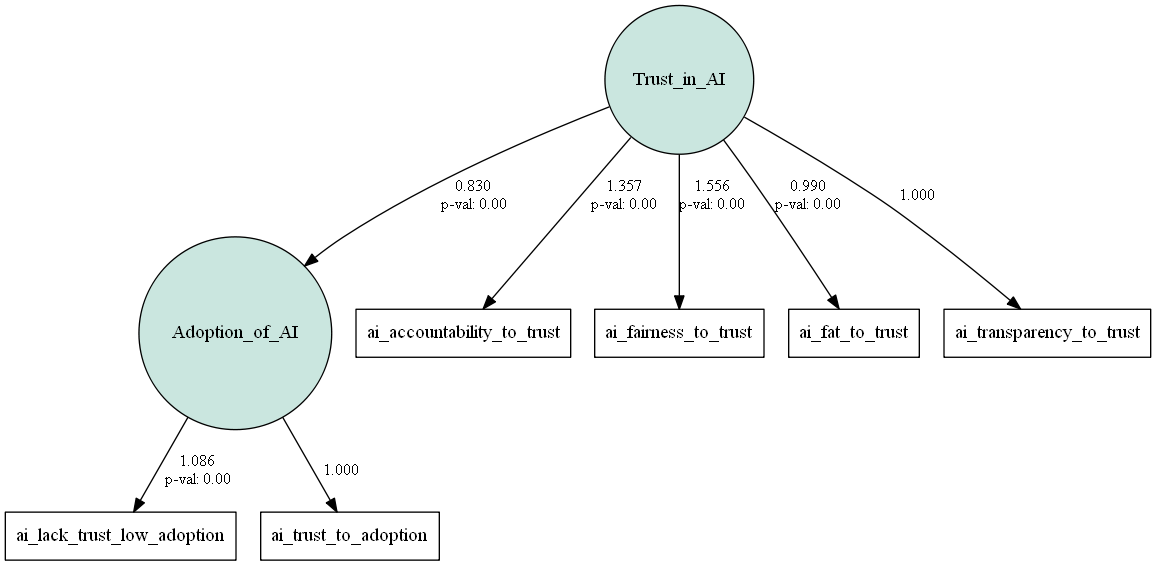

In [19]:
# plot sem
g = sem.semplot(model, 'images/model.png', plot_covs=True, plot_exos=True)
Image(filename='images/model.png') 